# Introducción
Telecom X, empresa del sector de telecomunicaciones, ha registrado un incremento sostenido en su tasa de churn, reflejando una creciente cancelación de clientes. Esta situación genera un riesgo directo sobre los ingresos y la estabilidad del negocio, por lo que resulta fundamental comprender las causas que la originan. El presente análisis tiene como objetivo identificar las variables que inciden en esta tendencia, evaluando factores como el gasto total del cliente, los patrones servicios activos y la segmentación de clientes, con el fin de proponer estrategias que permitan mitigarla y fortalecer la retención.

# Limpieza y Tratamiento de Datos

In [83]:
# Se importan las librerías necesarias para el desarrollo del proyecto

import json  # Permite manejar datos en formato JSON
import requests  # Sirve para realizar peticiones HTTP y obtener datos de internet
import pandas as pd  # Se utiliza para trabajar con datos en forma de tablas y analizarlos
from sklearn.preprocessing import LabelEncoder  # Convierte variables categóricas en valores numéricos
import matplotlib.pyplot as plt  # Se emplea para crear gráficos
import seaborn as sns  # Facilita la creación de gráficos más visuales y personalizados
from seaborn import color_palette  # Permite definir y usar paletas de colores en seaborn

In [84]:
# Se obtiene la información realizando una petición HTTP a una URL de GitHub,
# lo que permite acceder al archivo JSON con los datos de TelecomX.
telecom_x = requests.get("https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json")

# Se carga el contenido recibido utilizando la librería json,
# lo que convierte el texto en un objeto de Python (lista o diccionario).
resultado = json.loads(telecom_x.text)

# Se crea un DataFrame a partir del objeto de Python utilizando pandas,
# lo que organiza los datos en formato tabular para su análisis.
df_data_telecomX = pd.DataFrame(resultado)

# Se visualizan las primeras 5 filas del DataFrame,
# lo que permite verificar que la carga de datos se haya realizado correctamente.
df_data_telecomX.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [85]:
# Se transforma la estructura de datos usando la función json_normalize de pandas,
# lo que permite convertir datos anidados de tipo JSON en un DataFrame plano.
df_data_telecomX = pd.json_normalize(resultado)

# Se visualizan las primeras 5 filas del DataFrame,
# lo que permite confirmar que la normalización y carga de los datos se realizó correctamente.
df_data_telecomX.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [86]:
# Se genera un resumen estadístico de las columnas numéricas del DataFrame
# lo que incluye métricas como el conteo, la media, la desviación estándar,
# el valor mínimo, los cuartiles y el valor máximo.
df_data_telecomX.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [87]:
# Se obtiene información general del DataFrame utilizando el método info(),
# lo que muestra la cantidad de filas y columnas, el nombre de cada columna,
# el número de valores no nulos y el tipo de dato de cada una.
df_data_telecomX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [88]:
# Se consultan los tipos de datos de cada columna del DataFrame
# lo que permite identificar si son numéricos, de texto, booleanos, entre otros.
df_data_telecomX.dtypes

customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object

## Diccionario de datos

- customerID: número de identificación único de cada cliente
- Churn: si el cliente dejó o no la empresa
- gender: género (masculino y femenino)
- SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- Partner: si el cliente tiene o no una pareja
- Dependents: si el cliente tiene o no dependientes
- tenure: meses de contrato del cliente
- PhoneService: suscripción al servicio telefónico
- MultipleLines: suscripción a más de una línea telefónica
- InternetService: suscripción a un proveedor de internet
- OnlineSecurity: suscripción adicional de seguridad en línea
- OnlineBackup: suscripción adicional de respaldo en línea
- DeviceProtection: suscripción adicional de protección del dispositivo
- TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
- StreamingTV: suscripción de televisión por cable
- StreamingMovies: suscripción de streaming de películas
- Contract: tipo de contrato
- PaperlessBilling: si el cliente prefiere recibir la factura en línea
- PaymentMethod: forma de pago
- Charges.Monthly: total de todos los servicios del cliente por mes
- Charges.Total: total gastado por el cliente

In [89]:
# Se realiza una validación de data wrangling contando la cantidad de valores únicos 
# en la columna "customerID", lo que permite identificar el número real de clientes
# y detectar posibles duplicados en los datos.
df_data_telecomX["customerID"].nunique()

7267

In [90]:
# Se realiza una transformación de data wrangling convirtiendo la columna 
# "account.Charges.Total" a tipo numérico con la función to_numeric de pandas,
# lo que permite asegurar que los datos puedan usarse en cálculos.
# El parámetro errors="coerce" convierte a NaN los valores no numéricos.
df_data_telecomX["account.Charges.Total"] = pd.to_numeric(df_data_telecomX["account.Charges.Total"], errors="coerce")

# Se valida el cambio revisando la información general del DataFrame,
# confirmando que la columna ahora tenga tipo de dato numérico y verificando
# si hubo valores convertidos a NaN.
df_data_telecomX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [91]:
# Se realiza una validación de data wrangling filtrando las filas donde la columna
# "account.Charges.Total" tiene valores nulos (NaN),
# para identificar los "customerID" asociados a esos registros
# y así analizar posibles problemas en la carga o calidad de los datos.
df_data_telecomX.loc[df_data_telecomX["account.Charges.Total"].isnull(), "customerID"]

975     1371-DWPAZ
1775    2520-SGTTA
1955    2775-SEFEE
2075    2923-ARZLG
2232    3115-CZMZD
2308    3213-VVOLG
2930    4075-WKNIU
3134    4367-NUYAO
3203    4472-LVYGI
4169    5709-LVOEQ
5599    7644-OMVMY
Name: customerID, dtype: object

In [92]:
# Se realiza una validación de data wrangling seleccionando las filas a partir del índice 4169,
# lo que permite revisar registros específicos hacia el final del DataFrame
# y verificar posibles inconsistencias, datos atípicos o errores en la carga.
df_data_telecomX.loc[4169:]

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN
4170,5712-AHQNN,No,Female,0,No,No,43,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,91.65,3954.10
4171,5712-PTIWW,Yes,Male,0,No,No,2,Yes,No,Fiber optic,...,No,Yes,Yes,No,No,Month-to-month,Yes,Electronic check,79.85,152.45
4172,5712-VBOXD,No,Female,0,No,No,4,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.15,68.45
4173,5716-EZXZN,No,Female,0,Yes,Yes,65,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,No,Two year,Yes,Credit card (automatic),99.05,6416.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [93]:
# Se realiza una validación de data wrangling contando la cantidad total de valores nulos (NaN) 
# en la columna "account.Charges.Total", lo que permite medir el nivel de datos faltantes 
# y decidir si es necesario imputarlos o eliminarlos.
df_data_telecomX["account.Charges.Total"].isnull().sum()

np.int64(11)

In [94]:
# Se realiza una limpieza de datos dentro del proceso de data wrangling eliminando 
# todas las filas que contienen valores nulos (NaN) en cualquier columna.
# El parámetro inplace=True aplica el cambio directamente sobre el DataFrame original.
df_data_telecomX.dropna(inplace=True)

In [95]:
# Se valida el estado actual del DataFrame después de la limpieza de datos,
# verificando la cantidad de filas y columnas, los tipos de datos 
# y confirmando que ya no existan valores nulos.
df_data_telecomX.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7256 non-null   object 
 2   customer.gender            7256 non-null   object 
 3   customer.SeniorCitizen     7256 non-null   int64  
 4   customer.Partner           7256 non-null   object 
 5   customer.Dependents        7256 non-null   object 
 6   customer.tenure            7256 non-null   int64  
 7   phone.PhoneService         7256 non-null   object 
 8   phone.MultipleLines        7256 non-null   object 
 9   internet.InternetService   7256 non-null   object 
 10  internet.OnlineSecurity    7256 non-null   object 
 11  internet.OnlineBackup      7256 non-null   object 
 12  internet.DeviceProtection  7256 non-null   object 
 13  internet.TechSupport       7256 non-null   object 
 1

In [96]:
# Se revisa si hay valores vacíos (solo con espacios o en blanco) en cada columna
# y se cuenta cuántos hay por columna.
df_data_telecomX.apply(lambda x: x.astype(str).str.strip() == '').sum()

customerID                     0
Churn                        224
customer.gender                0
customer.SeniorCitizen         0
customer.Partner               0
customer.Dependents            0
customer.tenure                0
phone.PhoneService             0
phone.MultipleLines            0
internet.InternetService       0
internet.OnlineSecurity        0
internet.OnlineBackup          0
internet.DeviceProtection      0
internet.TechSupport           0
internet.StreamingTV           0
internet.StreamingMovies       0
account.Contract               0
account.PaperlessBilling       0
account.PaymentMethod          0
account.Charges.Monthly        0
account.Charges.Total          0
dtype: int64

In [97]:
# Se eliminan las filas donde la columna "Churn" está vacía o solo tiene espacios.
df_data_telecomX = df_data_telecomX[df_data_telecomX["Churn"].str.strip() != '']


In [98]:
# Se revisa nuevamente la información del DataFrame 
# para confirmar que ya no haya filas con "Churn" vacío.
df_data_telecomX.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.TechSupport       7032 non-null   object 
 1

# Análisis Exploratorio de Datos

In [99]:
# Se crea una nueva columna llamada "Cuentas_diarias" dividiendo 
# el valor mensual de "account.Charges.Monthly" entre 30 
# para calcular el cobro promedio por día.
df_data_telecomX["Cuentas_diarias"] = df_data_telecomX["account.Charges.Monthly"] / 30

In [100]:
# Se muestran las primeras 5 filas del DataFrame 
# para verificar que la nueva columna se haya creado correctamente.
df_data_telecomX.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [101]:
# Se crea un objeto LabelEncoder para convertir valores de texto a números.
le = LabelEncoder()

# Se seleccionan las columnas que tienen solo 2 valores únicos y son de tipo texto.
bool_data = [col for col in df_data_telecomX.columns if df_data_telecomX[col].nunique() == 2 and df_data_telecomX[col].dtypes == "object"]

# Se recorren esas columnas y se convierten sus valores de texto en números (0 y 1).
for col in bool_data:
    df_data_telecomX[col] = le.fit_transform(df_data_telecomX[col])

In [102]:
# Se muestran las primeras 5 filas del DataFrame 
# para verificar que las columnas con 2 valores de texto 
# se hayan convertido correctamente a números.
df_data_telecomX.head()

# 0 = Female, 1 = Male
# 0 = No,     1 = Yes

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_diarias
0,0002-ORFBO,0,0,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,1,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,1,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,1,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,0,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [103]:
# Se muestra un resumen con estadísticas básicas de las columnas numéricas,
# como la cantidad de datos, promedio, valores mínimos y máximos.
df_data_telecomX.describe()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,Cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [104]:
# Se recorre cada columna del DataFrame.
for col in df_data_telecomX.columns:
    # Si la columna es numérica (entera o decimal)...
    if df_data_telecomX[col].dtype == "int64" or df_data_telecomX[col].dtype == "float64":
        # ...se muestra su valor mediano.
        print(f"Mediana de '{col}':", df_data_telecomX[col].median())



Mediana de 'Churn': 0.0
Mediana de 'customer.gender': 1.0
Mediana de 'customer.SeniorCitizen': 0.0
Mediana de 'customer.Partner': 0.0
Mediana de 'customer.Dependents': 0.0
Mediana de 'customer.tenure': 29.0
Mediana de 'phone.PhoneService': 1.0
Mediana de 'account.PaperlessBilling': 1.0
Mediana de 'account.Charges.Monthly': 70.35
Mediana de 'account.Charges.Total': 1397.475
Mediana de 'Cuentas_diarias': 2.3449999999999998


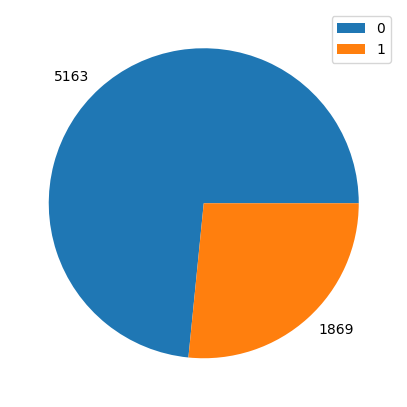

In [105]:
# Se crea un nuevo DataFrame con la cantidad de veces que aparece cada valor en la columna "Churn".
df_churn = pd.DataFrame(df_data_telecomX["Churn"].value_counts())
df_churn

# Se define el tamaño de la figura para el gráfico.
plt.figure(figsize=(5,8))

# Se crea un gráfico de pastel usando las cantidades de cada valor de "Churn".
plt.pie(df_churn["count"], labels=df_churn["count"])

# Se agrega una leyenda con las etiquetas correspondientes (índices del DataFrame).
plt.legend(df_churn.index);

In [106]:
# Se muestra la lista de columnas que tienen solo 2 valores únicos y son de tipo texto.
bool_data

['Churn',
 'customer.gender',
 'customer.Partner',
 'customer.Dependents',
 'phone.PhoneService',
 'account.PaperlessBilling']

In [107]:
# Se crean tablas que muestran la relación entre "Churn" y diferentes variables,
# contando cuántos registros hay para cada combinación de valores.
relacion_churn_gender = df_data_telecomX.groupby(["Churn", "customer.gender"]).size().unstack(fill_value=0)
relacion_churn_partner = df_data_telecomX.groupby(["Churn", "customer.Partner"]).size().unstack(fill_value=0)
relacion_churn_dependents = df_data_telecomX.groupby(["Churn", "customer.Dependents"]).size().unstack(fill_value=0)
relacion_churn_PhoneService = df_data_telecomX.groupby(["Churn", "phone.PhoneService"]).size().unstack(fill_value=0)
relacion_churn_PaperlessBilling = df_data_telecomX.groupby(["Churn", "account.PaperlessBilling"]).size().unstack(fill_value=0)

# Se muestra la tabla que relaciona "Churn" con "account.PaperlessBilling".
relacion_churn_PaperlessBilling


account.PaperlessBilling,0,1
Churn,,
0,2395,2768
1,469,1400


In [108]:
# Se crean manualmente DataFrames con datos base que muestran 
# la relación entre "Churn" y distintas variables.

# Relación entre Churn y género
relacion_churn = pd.DataFrame({
    0: [2544, 2619],  # Cantidades para cada valor
    1: [939, 930]
}, index=[0, 1])

# Relación entre Churn y si tiene pareja
relacion_churn_partner = pd.DataFrame({
    0: [2439, 2724],
    1: [1200, 669]
}, index=[0, 1])

# Relación entre Churn y si tiene dependientes
relacion_churn_dependents = pd.DataFrame({
    0: [3390, 1773],
    1: [1543, 326]
}, index=[0, 1])

# Relación entre Churn y si tiene servicio telefónico
relacion_churn_PhoneService = pd.DataFrame({
    0: [510, 4653],
    1: [170, 1699]
}, index=[0, 1])

# Relación entre Churn y si tiene facturación sin papel
relacion_churn_PaperlessBilling = pd.DataFrame({
    0: [2395, 2768],
    1: [469, 1400]
}, index=[0, 1])

In [109]:
# --- Subplot 1: Género ---
# Se cambian las etiquetas del índice para que sean más descriptivas.
relacion_churn.index = relacion_churn.index.map({0: '0 - Mujer', 1: '1 - Hombre'})
# Se calcula el porcentaje para cada columna, dividiendo entre el total por fila.
relacion_churn_pct = relacion_churn.div(relacion_churn.sum(axis=1), axis=0) * 100
# Se renombran las columnas para indicar claramente qué significa cada valor.
relacion_churn_pct = relacion_churn_pct.rename(columns={0: '0 - No', 1: '1 - Sí'})

# --- Subplot 2: Pareja ---
relacion_churn_partner.index = relacion_churn_partner.index.map({0: '0 - Sin pareja', 1: '1 - Con pareja'})
relacion_churn_pct_partner = relacion_churn_partner.div(relacion_churn_partner.sum(axis=1), axis=0) * 100
relacion_churn_pct_partner = relacion_churn_pct_partner.rename(columns={0: '0 - No', 1: '1 - Sí'})

# --- Subplot 3: Dependientes ---
relacion_churn_dependents.index = relacion_churn_dependents.index.map({0: '0 - Sin dependientes', 1: '1 - Con dependientes'})
relacion_churn_pct_dependents = relacion_churn_dependents.div(relacion_churn_dependents.sum(axis=1), axis=0) * 100
relacion_churn_pct_dependents = relacion_churn_pct_dependents.rename(columns={0: '0 - No', 1: '1 - Sí'})

# --- Subplot 4: Servicio telefónico ---
relacion_churn_PhoneService.index = relacion_churn_PhoneService.index.map({0: '0 - Sin servicio', 1: '1 - Con servicio'})
relacion_churn_pct_PhoneService = relacion_churn_PhoneService.div(relacion_churn_PhoneService.sum(axis=1), axis=0) * 100
relacion_churn_pct_PhoneService = relacion_churn_pct_PhoneService.rename(columns={0: '0 - No', 1: '1 - Sí'})

# --- Subplot 5: Facturación ---
relacion_churn_PaperlessBilling.index = relacion_churn_PaperlessBilling.index.map({0: '0 - En papel', 1: '1 - En Línea'})
relacion_churn_pct_PaperlessBilling = relacion_churn_PaperlessBilling.div(relacion_churn_PaperlessBilling.sum(axis=1), axis=0) * 100
relacion_churn_pct_PaperlessBilling = relacion_churn_pct_PaperlessBilling.rename(columns={0: '0 - No', 1: '1 - Sí'})

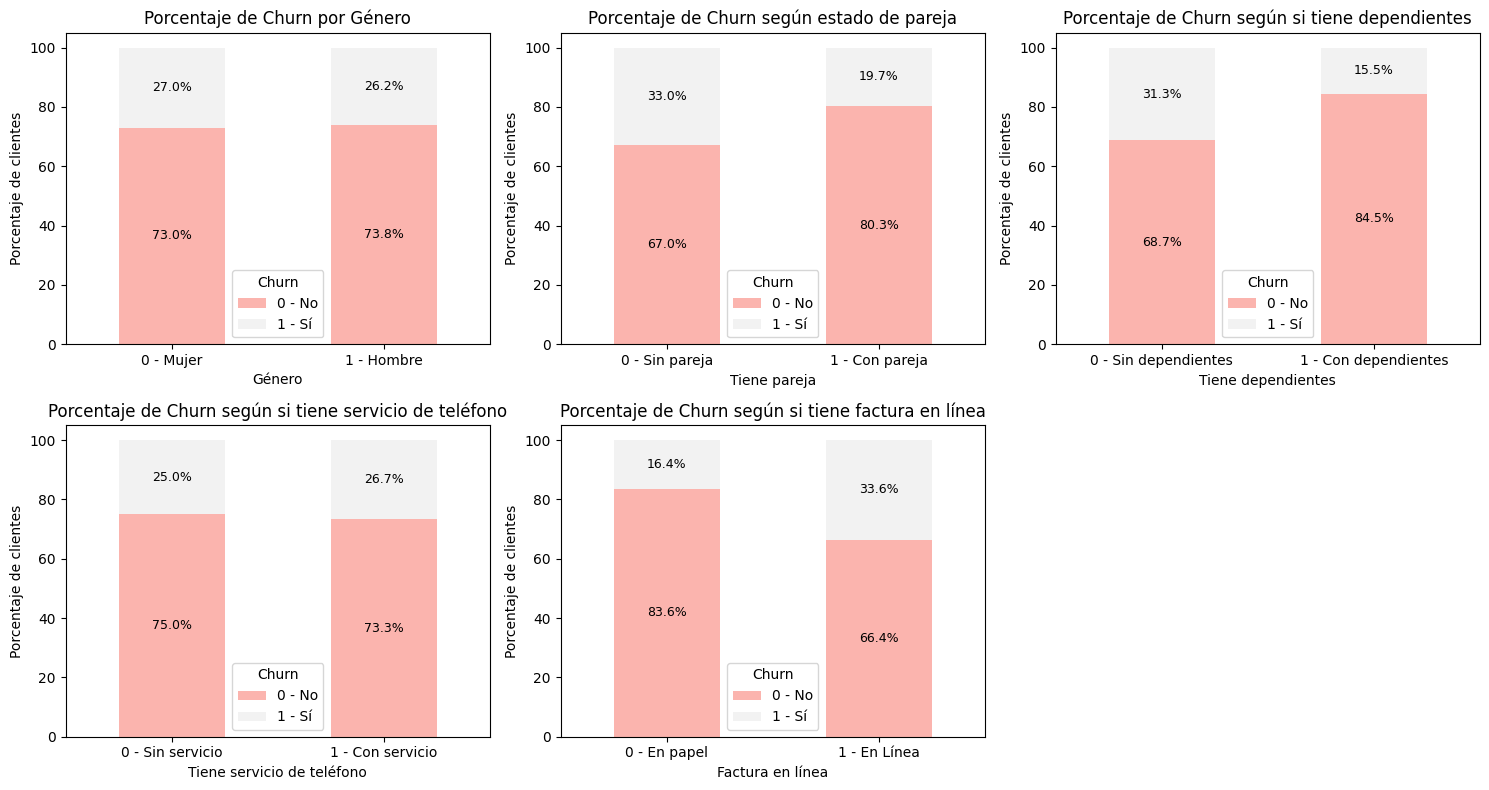

In [110]:
# Se crea una figura con una cuadrícula de 2 filas por 3 columnas para colocar los gráficos
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Se convierte el arreglo de ejes en una lista plana para facilitar el acceso por índice
axs = axs.flatten()

# ---- Subplot 1: Churn por Género ----
relacion_churn_pct.plot(
    kind='bar', stacked=True, colormap='Pastel1', ax=axs[0]
)

# ---- Subplot 2: Churn según estado de pareja ----
relacion_churn_pct_partner.plot(
    kind='bar', stacked=True, colormap='Pastel1', ax=axs[1]
)

# ---- Subplot 3: Churn según dependientes ----
relacion_churn_pct_dependents.plot(
    kind='bar', stacked=True, colormap='Pastel1', ax=axs[2]
)

# ---- Subplot 4: Churn según servicio de teléfono ----
relacion_churn_pct_PhoneService.plot(
    kind='bar', stacked=True, colormap='Pastel1', ax=axs[3]
)

# ---- Subplot 5: Churn según facturación en línea ----
relacion_churn_pct_PaperlessBilling.plot(
    kind='bar', stacked=True, colormap='Pastel1', ax=axs[4]
)

# Se añaden etiquetas de porcentaje sobre las barras del primer gráfico (género)
for i, genero in enumerate(relacion_churn_pct.index):
    acumulado = 0
    for churn in relacion_churn_pct.columns:
        valor = relacion_churn_pct.loc[genero, churn]
        if valor > 0:
            axs[0].text(
                i, acumulado + valor / 2,
                f'{valor:.1f}%', ha='center', va='center', fontsize=9
            )
        acumulado += valor

# Se añaden etiquetas de porcentaje para el segundo gráfico (estado de pareja)
for i, pareja in enumerate(relacion_churn_pct_partner.index):
    acumulado = 0
    for churn in relacion_churn_pct_partner.columns:
        valor = relacion_churn_pct_partner.loc[pareja, churn]
        if valor > 0:
            axs[1].text(
                i, acumulado + valor / 2,
                f'{valor:.1f}%', ha='center', va='center', fontsize=9
            )
        acumulado += valor

# Se añaden etiquetas de porcentaje para el tercer gráfico (dependientes)
for i, dependientes in enumerate(relacion_churn_pct_dependents.index):
    acumulado = 0
    for churn in relacion_churn_pct_dependents.columns:
        valor = relacion_churn_pct_dependents.loc[dependientes, churn]
        if valor > 0:
            axs[2].text(
                i, acumulado + valor / 2,
                f'{valor:.1f}%', ha='center', va='center', fontsize=9
            )
        acumulado += valor

# Se añaden etiquetas de porcentaje para el cuarto gráfico (servicio de teléfono)
for i, phone_service in enumerate(relacion_churn_pct_PhoneService.index):
    acumulado = 0
    for churn in relacion_churn_pct_PhoneService.columns:
        valor = relacion_churn_pct_PhoneService.loc[phone_service, churn]
        if valor > 0:
            axs[3].text(
                i, acumulado + valor / 2,
                f'{valor:.1f}%', ha='center', va='center', fontsize=9
            )
        acumulado += valor

# Se añaden etiquetas de porcentaje para el quinto gráfico (facturación en línea)
for i, PaperlessBilling in enumerate(relacion_churn_pct_PaperlessBilling.index):
    acumulado = 0
    for churn in relacion_churn_pct_PaperlessBilling.columns:
        valor = relacion_churn_pct_PaperlessBilling.loc[PaperlessBilling, churn]
        if valor > 0:
            axs[4].text(
                i, acumulado + valor / 2,
                f'{valor:.1f}%', ha='center', va='center', fontsize=9
            )
        acumulado += valor

# Personalización del primer gráfico
axs[0].set_title('Porcentaje de Churn por Género')
axs[0].set_xlabel('Género')
axs[0].set_ylabel('Porcentaje de clientes')
axs[0].legend(title='Churn')
axs[0].set_xticklabels(relacion_churn_pct.index, rotation=0)

# Personalización del segundo gráfico
axs[1].set_title('Porcentaje de Churn según estado de pareja')
axs[1].set_xlabel('Tiene pareja')
axs[1].set_ylabel('Porcentaje de clientes')
axs[1].legend(title='Churn')
axs[1].set_xticklabels(relacion_churn_pct_partner.index, rotation=0)

# Personalización del tercer gráfico
axs[2].set_title('Porcentaje de Churn según si tiene dependientes')
axs[2].set_xlabel('Tiene dependientes')
axs[2].set_ylabel('Porcentaje de clientes')
axs[2].legend(title='Churn')
axs[2].set_xticklabels(relacion_churn_pct_dependents.index, rotation=0)

# Personalización del cuarto gráfico
axs[3].set_title('Porcentaje de Churn según si tiene servicio de teléfono')
axs[3].set_xlabel('Tiene servicio de teléfono')
axs[3].set_ylabel('Porcentaje de clientes')
axs[3].legend(title='Churn')
axs[3].set_xticklabels(relacion_churn_pct_PhoneService.index, rotation=0)

# Personalización del quinto gráfico
axs[4].set_title('Porcentaje de Churn según si tiene factura en línea')
axs[4].set_xlabel('Factura en línea')
axs[4].set_ylabel('Porcentaje de clientes')
axs[4].legend(title='Churn')
axs[4].set_xticklabels(relacion_churn_pct_PaperlessBilling.index, rotation=0)

# Se oculta el sexto espacio de la cuadrícula ya que no se usa
axs[5].axis('off')

# Ajusta el espaciado entre gráficos y se muestran todos
plt.tight_layout()
plt.show()




In [111]:
# Se crea una lista con los nombres de las columnas que tienen exactamente 3 valores únicos
# y cuyo tipo de dato es texto (object).
other_data = [col for col in df_data_telecomX.columns if df_data_telecomX[col].nunique() == 3 and df_data_telecomX[col].dtypes == "object"]

# Se muestra la lista resultante.
other_data

['phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract']

In [112]:
# Se agrupan los datos por la columna "Churn" y el método de pago de la cuenta ("account.PaymentMethod"),
# contando la cantidad de clientes en cada combinación. 
# Se reorganiza la tabla para que las categorías de "account.PaymentMethod" sean columnas, 
# reemplazando valores faltantes por cero.
relacion_churn_payment_method = df_data_telecomX.groupby(["Churn","account.PaymentMethod"]).size().unstack(fill_value=0)

# Se agrupan los datos por la columna "Churn" y el tipo de contrato ("account.Contract"),
# contando la cantidad de clientes en cada combinación.
# Se reorganiza la tabla para que las categorías de "account.Contract" sean columnas,
# reemplazando valores faltantes por cero.
relacion_churn_contract = df_data_telecomX.groupby(["Churn","account.Contract"]).size().unstack(fill_value=0)

# Se agrupan los datos por la columna "Churn" y el tipo de servicio de internet ("internet.InternetService"),
# contando la cantidad de clientes en cada combinación.
# Se reorganiza la tabla para que las categorías de "internet.InternetService" sean columnas,
# reemplazando valores faltantes por cero.
relacion_churn_internet_service = df_data_telecomX.groupby(["Churn","internet.InternetService"]).size().unstack(fill_value=0)

# Se muestra la tabla con la relación entre Churn y el tipo de servicio de internet.
relacion_churn_internet_service

internet.InternetService,DSL,Fiber optic,No
Churn,,,
0,1957,1799,1407
1,459,1297,113


In [113]:
# Crea un DataFrame que muestra la relación entre "Churn" y el método de pago.
# Las filas representan diferentes métodos de pago (índices 0 a 3),
# mientras que las columnas indican: 
# 0 = clientes que no se dieron de baja, 1 = clientes que sí se dieron de baja.
relacion_churn_payment_method = pd.DataFrame({
    0: [1284, 1289, 1294, 1296],
    1: [258, 232, 1071, 308]
}, index=[0, 1, 2, 3])

# Crea un DataFrame que muestra la relación entre "Churn" y el tipo de contrato.
# Las filas representan los distintos tipos de contrato (índices 0 a 2),
# mientras que las columnas indican la cantidad de clientes que no se dieron de baja (0)
# y los que sí lo hicieron (1).
relacion_churn_contract = pd.DataFrame({
    0: [2220, 1306, 1637],
    1: [1655, 166, 48]
}, index=[0, 1, 2])

# Crea un DataFrame que muestra la relación entre "Churn" y el tipo de servicio de internet.
# Las filas representan los distintos tipos de servicio de internet (índices 0 a 2),
# mientras que las columnas muestran el número de clientes que no se dieron de baja (0)
# y los que sí se dieron de baja (1).
relacion_churn_internet_service = pd.DataFrame({
    0: [1957, 1799, 1407],
    1: [459, 1297, 113]
}, index=[0, 1, 2])

In [114]:
# Renombramiento de etiquetas y cambio a porcentaje - subplot1
relacion_churn_payment_method.index = relacion_churn_payment_method.index.map({0: 'Bank transfer', 1: 'Credit card', 2: 'Electronic check', 3: 'Mailed check'})
relacion_churn_pct_payment_method = relacion_churn_payment_method.div(relacion_churn_payment_method.sum(axis=1), axis=0) * 100
relacion_churn_pct_payment_method = relacion_churn_pct_payment_method.rename(columns={0: '0 - No', 1: '1 - Sí'})

# Renombramiento de etiquetas y cambio a porcentaje - subplot2
relacion_churn_contract.index = relacion_churn_contract.index.map({0: 'Month-to-month', 1: 'One year', 2: 'Two year'})
relacion_churn_pct_contract = relacion_churn_contract.div(relacion_churn_contract.sum(axis=1), axis=0) * 100
relacion_churn_pct_contract = relacion_churn_pct_contract.rename(columns={0: '0 - No', 1: '1 - Sí'})

# Renombramiento de etiquetas y cambio a porcentaje - subplot3
relacion_churn_internet_service.index = relacion_churn_internet_service.index.map({0: 'DSL', 1: 'Fiber Optic', 2: 'No internet'})
relacion_churn_pct_internet_service = relacion_churn_internet_service.div(relacion_churn_internet_service.sum(axis=1), axis=0) * 100
relacion_churn_pct_internet_service = relacion_churn_pct_internet_service.rename(columns={0: '0 - No', 1: '1 - Sí'})

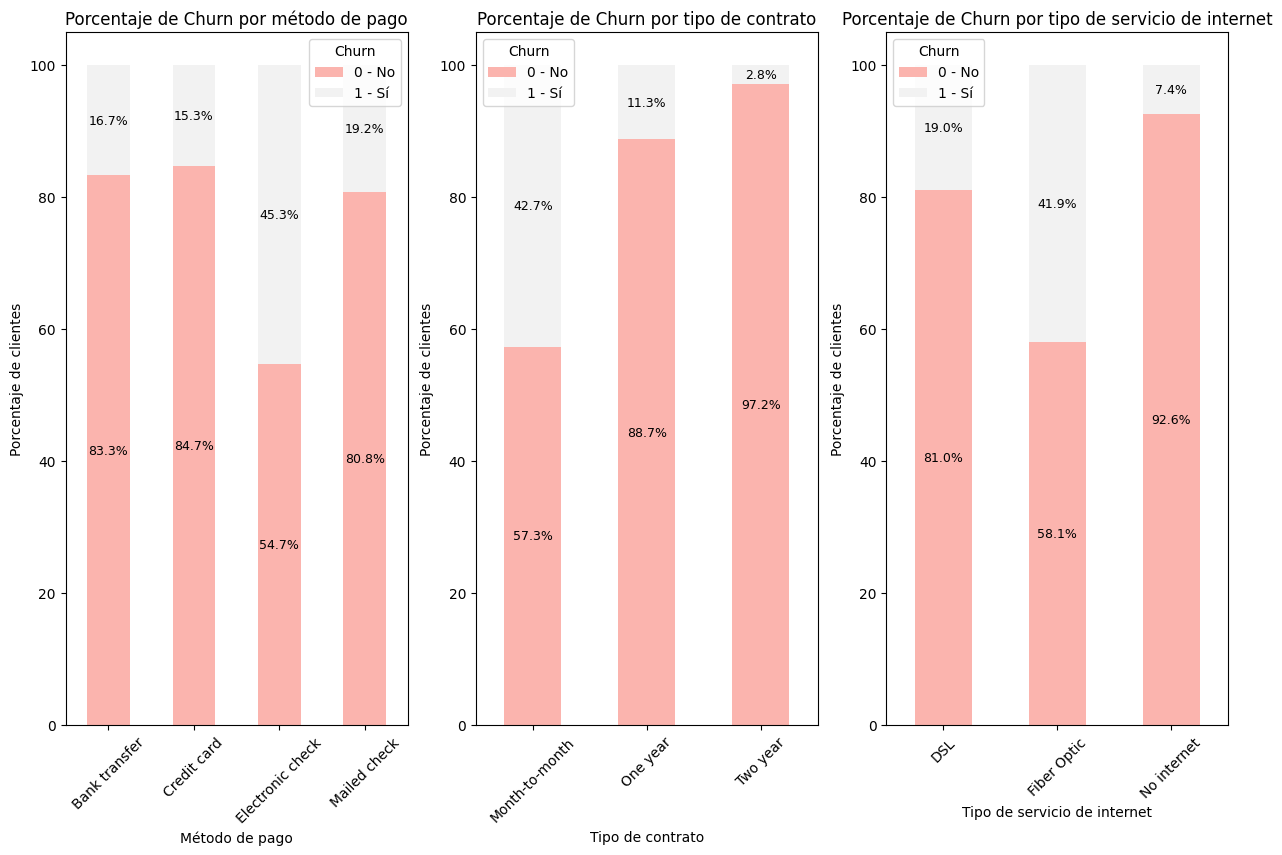

In [115]:
# Crear figura: 1 filas × 3 columnas
fig, axs = plt.subplots(1, 3, figsize=(15, 9))

# Convertir axs a lista plana
axs = axs.flatten()

# ---- Subplot 1 ----
relacion_churn_pct_payment_method.plot(
    kind='bar', stacked=True, colormap='Pastel1', ax=axs[0]
)

# ---- Subplot 2 ----
relacion_churn_pct_contract.plot(
    kind='bar', stacked=True, colormap='Pastel1', ax=axs[1]
)

# ---- Subplot 3 ----
relacion_churn_pct_internet_service.plot(
    kind='bar', stacked=True, colormap='Pastel1', ax=axs[2]
)

# Etiquetas de porcentaje -- subplot1
for i, payment_method in enumerate(relacion_churn_pct_payment_method.index):
    acumulado = 0
    for churn in relacion_churn_pct_payment_method.columns:
        valor = relacion_churn_pct_payment_method.loc[payment_method, churn]
        if valor > 0:
            axs[0].text(
                i, acumulado + valor / 2,
                f'{valor:.1f}%', ha='center', va='center', fontsize=9
            )
        acumulado += valor


# Etiquetas de porcentaje -- subplot2
for i, contract in enumerate(relacion_churn_pct_contract.index):
    acumulado = 0
    for churn in relacion_churn_pct_contract.columns:
        valor = relacion_churn_pct_contract.loc[contract, churn]
        if valor > 0:
            axs[1].text(
                i, acumulado + valor / 2,
                f'{valor:.1f}%', ha='center', va='center', fontsize=9
            )
        acumulado += valor

# Etiquetas de porcentaje -- subplot3
for i, internet_service in enumerate(relacion_churn_pct_internet_service.index):
    acumulado = 0
    for churn in relacion_churn_pct_internet_service.columns:
        valor = relacion_churn_pct_internet_service.loc[internet_service, churn]
        if valor > 0:
            axs[2].text(
                i, acumulado + valor / 2,
                f'{valor:.1f}%', ha='center', va='center', fontsize=9
            )
        acumulado += valor

# Personalizar subplot 1
axs[0].set_title('Porcentaje de Churn por método de pago')
axs[0].set_xlabel('Método de pago')
axs[0].set_ylabel('Porcentaje de clientes')
axs[0].legend(title='Churn')
axs[0].set_xticklabels(relacion_churn_pct_payment_method.index, rotation=45)

# Personalizar subplot 2
axs[1].set_title('Porcentaje de Churn por tipo de contrato')
axs[1].set_xlabel('Tipo de contrato')
axs[1].set_ylabel('Porcentaje de clientes')
axs[1].legend(title='Churn')
axs[1].set_xticklabels(relacion_churn_pct_contract.index, rotation=45)

# Personalizar subplot 3
axs[2].set_title('Porcentaje de Churn por tipo de servicio de internet')
axs[2].set_xlabel('Tipo de servicio de internet')
axs[2].set_ylabel('Porcentaje de clientes')
axs[2].legend(title='Churn')
axs[2].set_xticklabels(relacion_churn_pct_internet_service.index, rotation=45);

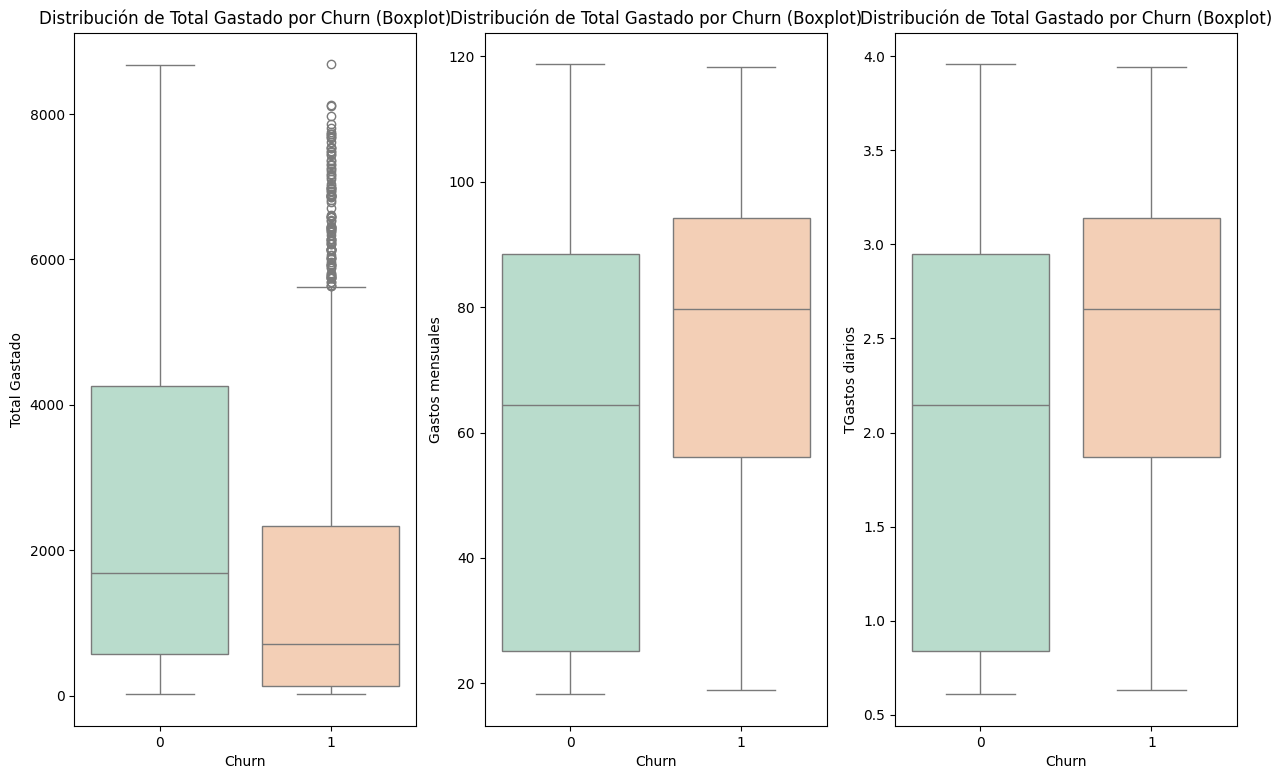

In [116]:
# Crear figura: 1 filas × 3 columnas
fig, axs = plt.subplots(1, 3, figsize=(15, 9))

# Convertir axs a lista plana
axs = axs.flatten()

# Definir una paleta 
palette = color_palette("Pastel2", 2)

# Boxplot Cargos Totales
sns.boxplot(
    data=df_data_telecomX, x="Churn", y="account.Charges.Total",
    ax=axs[0],
    palette=palette,
    legend=False,
    hue="Churn"
)
axs[0].set_title("Distribución de Total Gastado por Churn (Boxplot)")
axs[0].set_xlabel("Churn")
axs[0].set_ylabel("Total Gastado")

# Boxplot Cargos Mensuales
sns.boxplot(
    data=df_data_telecomX, x="Churn", y="account.Charges.Monthly",
    ax=axs[1],
    palette=palette,
    legend=False,
    hue="Churn"
)
axs[1].set_title("Distribución de Total Gastado por Churn (Boxplot)")
axs[1].set_xlabel("Churn")
axs[1].set_ylabel("Gastos mensuales")

# Boxplot Cargos Diarios
sns.boxplot(
    data=df_data_telecomX, x="Churn", y="Cuentas_diarias",
    ax=axs[2],
    palette=palette,
    legend=False,
    hue="Churn"
)
axs[2].set_title("Distribución de Total Gastado por Churn (Boxplot)")
axs[2].set_xlabel("Churn")
axs[2].set_ylabel("TGastos diarios");

## Análisis de correlación

In [117]:
datos_num = []  # Lista vacía para almacenar los nombres de columnas numéricas

# Se recorre cada columna del DataFrame df_data_telecomX
for col in df_data_telecomX.columns:
    # Se verifica si el tipo de dato de la columna es entero (int64) o decimal (float64)
    if df_data_telecomX[col].dtype == "int64" or df_data_telecomX[col].dtype == "float64":
        datos_num.append(col)  # Si es numérica, se añade el nombre de la columna a la lista datos_num

# Finalmente, se muestra la lista con los nombres de las columnas numéricas
datos_num


['Churn',
 'customer.gender',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'customer.tenure',
 'phone.PhoneService',
 'account.PaperlessBilling',
 'account.Charges.Monthly',
 'account.Charges.Total',
 'Cuentas_diarias']

In [118]:
# Calcula la matriz de correlación entre las columnas numéricas del DataFrame
correlacion = df_data_telecomX[datos_num].corr()

# Muestra la matriz de correlación resultante
correlacion

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,Cuentas_diarias
Churn,1.000000,-0.008545,0.150541,-0.149982,-0.163128,-0.354049,0.011691,0.191454,0.192858,-0.199484,0.192858
customer.gender,-0.008545,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.011902,-0.013779,0.000048,-0.013779
customer.SeniorCitizen,0.150541,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.156258,0.219874,0.102411,0.219874
customer.Partner,-0.149982,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,-0.013957,0.097825,0.319072,0.097825
customer.Dependents,-0.163128,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.110131,-0.112343,0.064653,-0.112343
customer.tenure,-0.354049,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.004823,0.246862,0.825880,0.246862
phone.PhoneService,0.011691,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.016696,0.248033,0.113008,0.248033
account.PaperlessBilling,0.191454,-0.011902,0.156258,-0.013957,-0.110131,0.004823,0.016696,1.000000,0.351930,0.157830,0.351930
account.Charges.Monthly,0.192858,-0.013779,0.219874,0.097825,-0.112343,0.246862,0.248033,0.351930,1.000000,0.651065,1.000000
account.Charges.Total,-0.199484,0.000048,0.102411,0.319072,0.064653,0.825880,0.113008,0.157830,0.651065,1.000000,0.651065


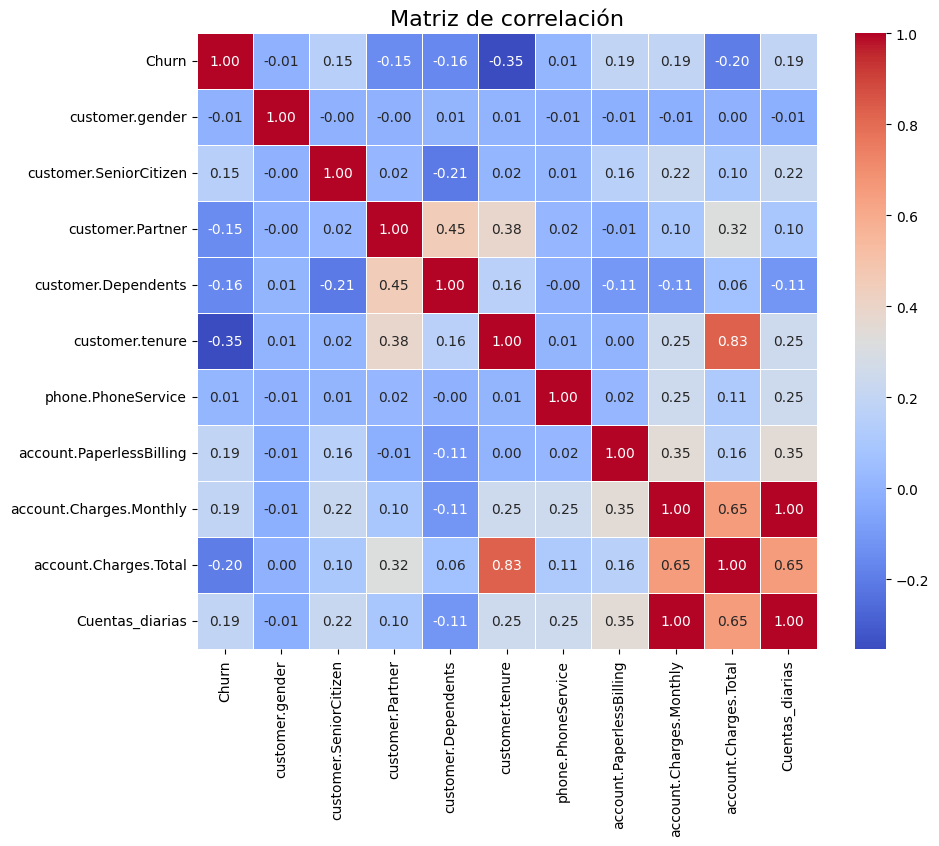

In [119]:
plt.figure(figsize=(10,8))  
# Crea una figura de tamaño 10x8 pulgadas para el gráfico

sns.heatmap(
    correlacion,          # Datos: matriz de correlación calculada previamente
    annot=True,           # Muestra los valores numéricos dentro de cada celda
    cmap='coolwarm',      # Paleta de colores que va de tonos fríos a cálidos para representar valores negativos y positivos
    fmt=".2f",            # Formato de los números con dos decimales
    linewidths=0.5        # Grosor de las líneas que separan las celdas del mapa de calor
)

plt.title("Matriz de correlación", fontsize=16);  
# Añade un título al gráfico con tamaño de fuente 16

# Conclusión punto extra, Análisis de correlación

- **El tiempo de permanencia del cliente (customer.tenure)** presenta una correlación negativa moderada con Churn (-0.35), lo que indica que los clientes con mayor antigüedad tienden a cancelar menos su servicio.

- **La relación entre cargos totales y permanencia** muestra una correlación alta (0.83), sugiriendo que a mayor tiempo en la compañía, mayor es el monto acumulado en account.Charges.Total.

## Conclusiones del Análisis de Churn

1. **Tipo de contrato como factor clave de retención**  
   Los clientes con contratos mensuales presentan una tasa de churn significativamente más alta que aquellos con contratos de uno o dos años.  
   Los contratos de mayor duración parecen ofrecer estabilidad y fomentar la permanencia, posiblemente por beneficios asociados o menor disposición a cancelar antes de finalizar el periodo acordado.  

2. **Método de pago y facilidad de cancelación**  
   El uso de cheque electrónico está vinculado a una mayor proporción de bajas, mientras que métodos automáticos como transferencia bancaria o tarjeta de crédito presentan menor churn.  
   Esto sugiere que la facilidad para detener pagos podría influir en la decisión de cancelar el servicio.  

3. **Servicio de internet y experiencia del cliente**  
   Los clientes con fibra óptica muestran un churn más elevado que los usuarios de DSL o los que no cuentan con servicio de internet.  
   Esto podría indicar expectativas más altas no satisfechas o mayor competencia en este segmento, lo que genera un riesgo de migración hacia otros proveedores.  

4. **Patrones de gasto y cancelación**  
   Quienes abandonan tienden a tener gastos mensuales más altos, pero no siempre un gasto total acumulado mayor.  
   Esto podría indicar cancelaciones tempranas motivadas por tarifas elevadas en los primeros meses, antes de que el cliente alcance un historial de facturación prolongado.  

## Highlights del Análisis

- Los contratos mensuales concentran la mayoría de las bajas.  
- El pago por cheque electrónico está asociado con mayor churn.  
- Usuarios con fibra óptica presentan más cancelaciones que DSL o sin internet.  
- Clientes con cargos mensuales elevados tienden a cancelar antes.  
- Métodos de pago automáticos se relacionan con mayor retención.  

# Recomendaciones para reducir el churn

- **Fomentar contratos de mayor permanencia**  
  Los clientes con contrato mes a mes tienen una tasa de abandono mucho más alta. Vale la pena diseñar campañas para que migren a planes anuales o bianuales, ofreciendo incentivos reales: descuentos acumulativos, servicios extra sin costo o beneficios exclusivos al completar el contrato. Esto ayuda a estabilizar ingresos y a reducir la rotación.

- **Mejorar la experiencia de clientes con fibra óptica**  
  Aunque es el servicio más avanzado, los clientes de fibra muestran un churn elevado. Es probable que haya problemas de servicio, soporte o precio. Sería clave revisar los tiempos de instalación, la velocidad real ofrecida y la atención técnica. Un plan específico de mejora para este segmento puede marcar la diferencia.

- **Promover métodos de pago con menor rotación**  
  Se observa que quienes pagan con transferencias automáticas o tarjeta tienen más fidelidad que los que usan cheques o pagos manuales. Podemos impulsar el cambio hacia estos métodos con beneficios como descuentos permanentes o acumulación de puntos, haciendo que el pago sea más cómodo y confiable.

- **Ajustar la oferta para clientes con cargos más altos**  
  Los clientes que pagan más al mes tienden a abandonar más. Esto puede deberse a que no perciben un valor acorde al precio. Una buena estrategia sería ofrecer planes más flexibles, descuentos temporales o beneficios adaptados a su uso real, evitando la sensación de estar pagando de más.

- **Actuar antes de que el cliente se vaya**  
  Con los patrones que ya tenemos, es posible identificar clientes en riesgo: contratos mensuales, fibra óptica, pagos manuales y cargos altos. Ante estos casos, podríamos activar un protocolo rápido de retención: contacto personalizado, oferta especial o revisión del plan para que sientan que la empresa se preocupa antes de que decidan irse.